In [22]:
import pandas as pd

df_x = pd.read_csv('../data/curated/dec/df_features.csv')
df_y = pd.read_csv('../data/curated/dec/df_target.csv')

In [24]:
y = df_y['label_encoded']  # <- 1D array

In [26]:
from sklearn.model_selection import train_test_split

# Primer split: 80% train_val, 20% test
x_train_val, x_test, y_train_val, y_test = train_test_split(
    df_x, y, test_size=0.2, stratify=y, random_state=42)
# Segundo split: de los 80%, separamos 75% train y 25% val → 60% train, 20% val, 20% test
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42)
#print(x_val)
#print(y_val)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Crear el modelo
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42)
# Entrenar con training set
rf.fit(x_train, y_train)
# Predecir en validation set
y_val_pred = rf.predict(x_val)
# Evaluar con classification_report
print("Random Forest - Validation Set")
print(classification_report(y_val, y_val_pred, target_names=['ATTACK', 'BENIGN']))
print(rf.score(x_train, y_train))
print(rf.score(x_test, y_test))

Random Forest - Validation Set
              precision    recall  f1-score   support

      ATTACK       1.00      1.00      1.00         8
      BENIGN       1.00      1.00      1.00       710

    accuracy                           1.00       718
   macro avg       1.00      1.00      1.00       718
weighted avg       1.00      1.00      1.00       718

1.0
1.0


In [30]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Then apply SMOTE only to training set
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)
# Crear el modelo
rf = RandomForestClassifier(random_state=42)
# Entrenar con training set
rf.fit(x_train_res, y_train_res)
# Predecir en validation set
y_val_pred = rf.predict(x_val)
# Evaluar con classification_report
print("Random Forest - Validation Set")
print(classification_report(y_val, y_val_pred, target_names=['ATTACK', 'BENIGN']))
print(rf.score(x_train_res, y_train_res))
print(rf.score(x_test, y_test))

Random Forest - Validation Set
              precision    recall  f1-score   support

      ATTACK       1.00      1.00      1.00         8
      BENIGN       1.00      1.00      1.00       710

    accuracy                           1.00       718
   macro avg       1.00      1.00      1.00       718
weighted avg       1.00      1.00      1.00       718

1.0
1.0


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

resultados_modelos = []

def evaluar_modelo(modelo, x_train, y_train, x_val, y_val, nombre_modelo="Modelo"):
    modelo.fit(x_train, y_train)
    y_val_pred = modelo.predict(x_val)
    
    acc = accuracy_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)

    resultados_modelos.append({
        "Modelo": nombre_modelo,
        "Accuracy": acc,
        "F1 Score": f1,
        "Precision": prec,
        "Recall": rec
    })
    
    print(f"{nombre_modelo} - Validation Set")
    print(classification_report(y_val, y_val_pred, target_names=['ATTACK', 'BENIGN']))
    
modelos = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (DecisionTreeClassifier(), "Decision Tree"),
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),
]

for modelo, nombre in modelos:
    evaluar_modelo(modelo, x_train, y_train, x_val, y_val, nombre)
    print("="*60)

Logistic Regression - Validation Set
              precision    recall  f1-score   support

      ATTACK       0.88      0.88      0.88         8
      BENIGN       1.00      1.00      1.00       710

    accuracy                           1.00       718
   macro avg       0.94      0.94      0.94       718
weighted avg       1.00      1.00      1.00       718

Decision Tree - Validation Set
              precision    recall  f1-score   support

      ATTACK       1.00      1.00      1.00         8
      BENIGN       1.00      1.00      1.00       710

    accuracy                           1.00       718
   macro avg       1.00      1.00      1.00       718
weighted avg       1.00      1.00      1.00       718

Gradient Boosting - Validation Set
              precision    recall  f1-score   support

      ATTACK       1.00      1.00      1.00         8
      BENIGN       1.00      1.00      1.00       710

    accuracy                           1.00       718
   macro avg       1.00  

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


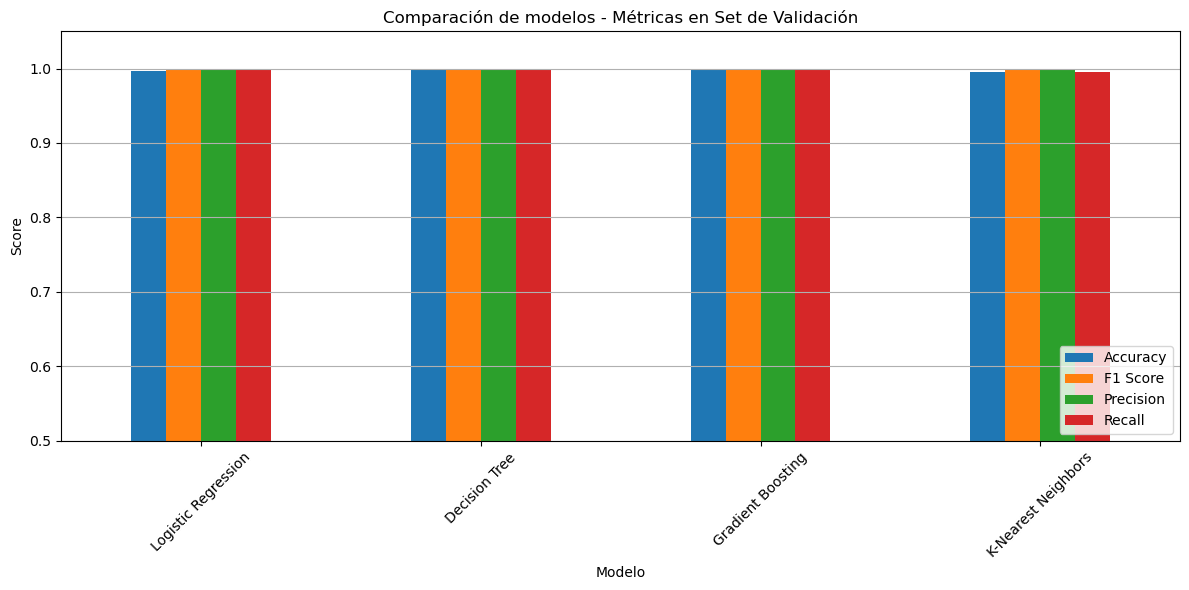

In [40]:
import matplotlib.pyplot as plt

df_resultados = pd.DataFrame(resultados_modelos)

# Graficar
df_resultados.set_index("Modelo").plot(kind="bar", figsize=(12,6))
plt.title("Comparación de modelos - Métricas en Set de Validación")
plt.ylabel("Score")
plt.ylim(0.5, 1.05)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

In [42]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# Define your model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
# Define scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
# Run cross-validation (e.g., 5-fold)
cv_results = cross_validate(
    model, df_x, y,
    cv=5,
    scoring=scoring,
    return_train_score=False
)
# Print results
print("Cross-Validation Results:")
for score in scoring:
    mean = cv_results[f'test_{score}'].mean()
    std = cv_results[f'test_{score}'].std()
    print(f"{score}: {mean:.4f} (+/- {std:.4f})")

Cross-Validation Results:
accuracy: 1.0000 (+/- 0.0000)
precision: 1.0000 (+/- 0.0000)
recall: 1.0000 (+/- 0.0000)
f1: 1.0000 (+/- 0.0000)


In [ ]:
'''Todos los modelos (Random Forest, Gradient Boosting, etc.) mostraron accuracy = 1.0, 
sugiriendo data leakage o sobreajuste.

SMOTE no mejoró las métricas, posiblemente por el desbalanceo extremo o variables 
redundantes.

La métrica accuracy es engañosa en contextos desbalanceados: priorizar Recall o F1-Score 
para la clase ATTACK.

La validación cruzada perfecta refuerza la necesidad de auditar variables y evitar filtrado 
de información.

Pasos Futuros:
Investigar y eliminar posibles fuentes de data leakage (ejemplo: ID_freq), probar técnicas 
híbridas de balanceo (SMOTEENN) y modelos como XGBoost, enfocándose en métricas robustas 
para la clase minoritaria.'''

